In [27]:
import numpy as np
from scipy.stats import multivariate_normal
from LabelRanking import LinearSortingFunction, mean_KTcorrelation
from mallows import MallowsModel

In [28]:
d = 10  # data dimension
k = 5  # labels

# Feature vectors distribution
D = multivariate_normal(mean=np.zeros(d), cov=np.identity(d))

# Linear Sorting Function
W = np.random.rand(k, d)

# Train data
X_train = D.rvs(size=10000)

R_train = LinearSortingFunction(X_train, W)
P_train = np.argsort(R_train, axis=1)

In [29]:
thetas = np.arange(0, 4.05, 0.05)
variances = np.arange(0, 16.05, .05)

MALLOWS_KT = {}
ADDITIVE_KT = {}

MALLOWS_01 = {}
ADDITIVE_01 = {}

for theta in thetas:
  mallows = MallowsModel(k, theta)
  P_train_noisy = np.array([mallows.sample(y) for y in P_train])
  MALLOWS_KT[theta] = mean_KTcorrelation(P_train, P_train_noisy)
  MALLOWS_01[theta] = np.mean([not np.array_equal(x, y) for x, y in zip(P_train, P_train_noisy)])

for variance in variances:
  if variance == 0:
    R_train_noisy = np.array([np.argsort(np.matmul(W, x))[::-1] for x in X_train])
  else:
    noise_dist = multivariate_normal(mean=np.zeros(k), cov=variance*np.identity(k))
    R_train_noisy = np.array([np.argsort(np.matmul(W, x) + noise_dist.rvs())[::-1] for x in X_train])
  P_train_noisy = np.argsort(R_train_noisy, axis=1)
  ADDITIVE_KT[variance] = mean_KTcorrelation(P_train, P_train_noisy)
  ADDITIVE_01[variance] = np.mean([not np.array_equal(x, y) for x, y in zip(P_train, P_train_noisy)])

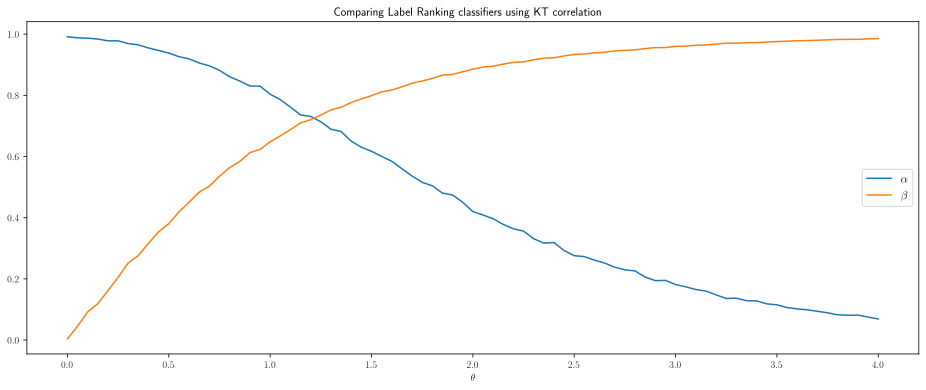

In [30]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

plt.rcParams['text.usetex'] = True

plt.figure(figsize=(16, 6))
plt.title('Comparing Label Ranking classifiers using KT correlation')
plt.plot(thetas, MALLOWS_01.values())
plt.plot(thetas, MALLOWS_KT.values())
plt.legend([
  r'$\alpha$',
  r'$\beta$',
  ], 
  fontsize=12
)
plt.xlabel(r"$\theta$")
plt.show()

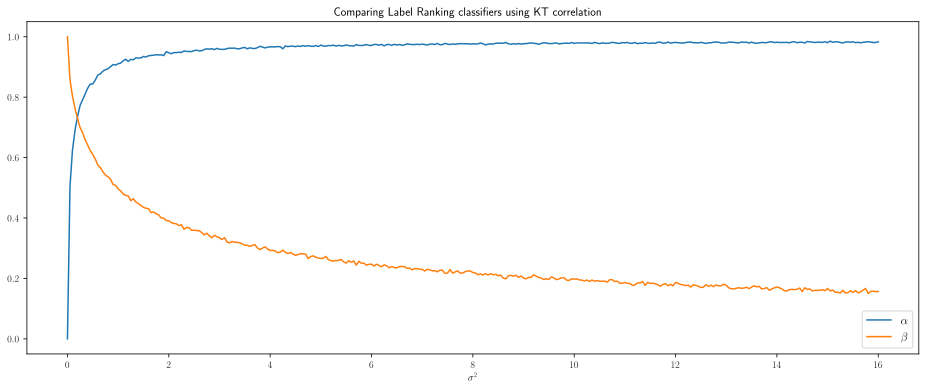

In [32]:
plt.figure(figsize=(16, 6))
plt.title('Comparing Label Ranking classifiers using KT correlation')
plt.plot(variances, ADDITIVE_01.values())
plt.plot(variances, ADDITIVE_KT.values())
plt.legend([
  r'$\alpha$',
  r'$\beta$',
  ], 
  fontsize=12
)
plt.xlabel(r"$\sigma^2$")
plt.show()